In [1]:
import pandas as pd
df=pd.read_csv("d:/data/customer/customer.csv")
df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [2]:
df["Churn"].value_counts()
#유지 2850, 이탈 483 불균형 데이터셋

0    2850
1     483
Name: Churn, dtype: int64

In [3]:
#변수 정의
train_cols=df.columns[0:16]
X=df[train_cols] #독립변수
y=df["Churn"] #종속변수

In [4]:
#오버샘플링
from imblearn.over_sampling import SMOTE
X_sample,y_sample=SMOTE(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=["Churn"])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [5]:
df_samp["Churn"].value_counts() 

1    2850
0    2850
Name: Churn, dtype: int64

In [6]:
X=df_samp[train_cols] #독립변수
y=df_samp["Churn"] #종속변수

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#데이터셋을 8:2로 구분
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=10)
#트리 모형 생성
model=DecisionTreeClassifier(random_state=0)
#모형 훈련
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [8]:
#예측정확도 확인
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
#과적합

1.0
0.9394736842105263


In [9]:
#트리 모형 생성(max_depth를 3으로 가지치기)
model=DecisionTreeClassifier(max_depth=3,random_state=0)
#모형 훈련
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [10]:
#예측정확도 확인
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8552631578947368
0.8605263157894737


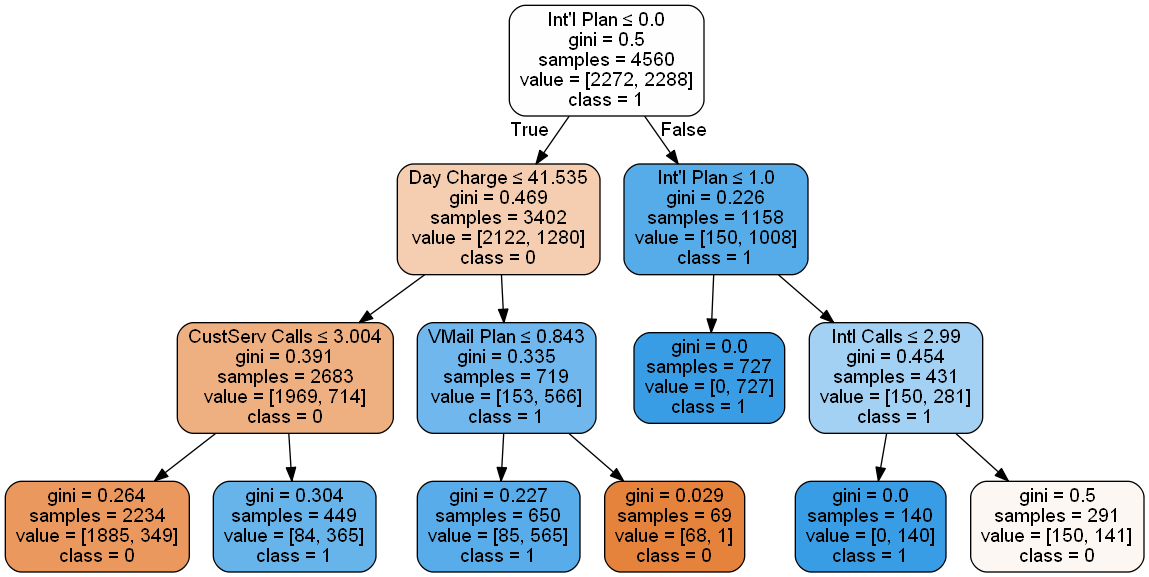

In [11]:
from sklearn.tree import export_graphviz
import pydotplus 
import graphviz
from IPython.display import Image

dot_data=export_graphviz(model,out_file=None,
    feature_names=train_cols, class_names=["0","1"],
    filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)    
Image(graph.create_png())

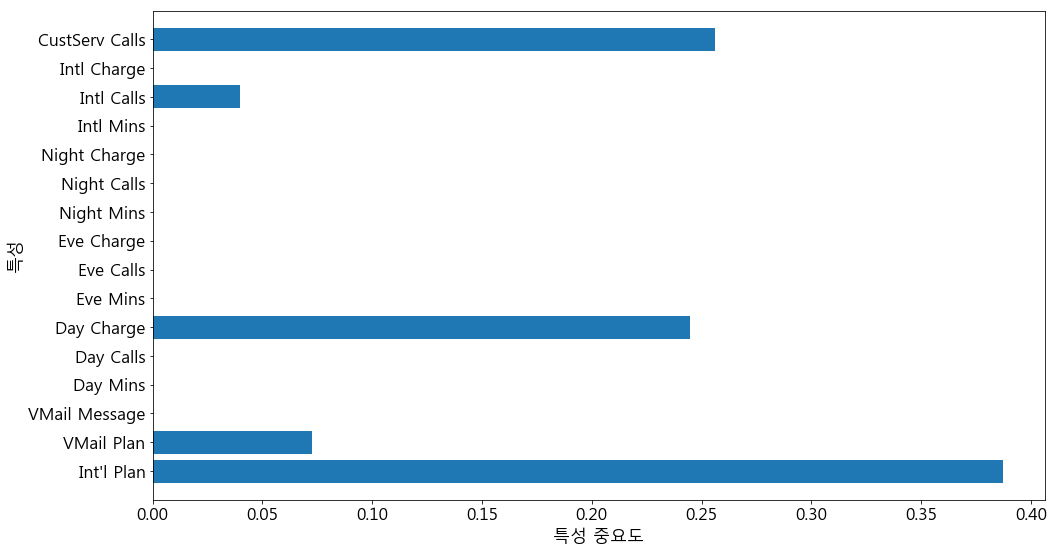

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)

def plot_tree(model):
    n_features=X.shape[1] #독립변수의 갯수
    plt.rcParams["figure.figsize"]=(16,9) #그래프의 가로,세로 인치
    plt.rcParams["font.size"]=17 #그래프의 폰트 사이즈
    plt.barh(range(n_features),model.feature_importances_,
             align="center")
    plt.yticks(np.arange(n_features),train_cols) 
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    
plot_tree(model)     #특성 중요도 그래프 출력
# Int'l Plan > CustServ Calls > Day Charge

In [13]:
from sklearn.ensemble import RandomForestClassifier
#랜덤포레스트 모델 생성
#n_estimators : 트리갯수
forest=RandomForestClassifier(
    n_estimators=100,random_state=100,max_depth=4)
forest.fit(X_train, y_train)  #모델 훈련

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [14]:
print(forest.score(X_train,y_train)) #학습용 데이터셋의 정확도
print(forest.score(X_test,y_test)) #검증용 데이터셋의 정확도

0.8995614035087719
0.893859649122807


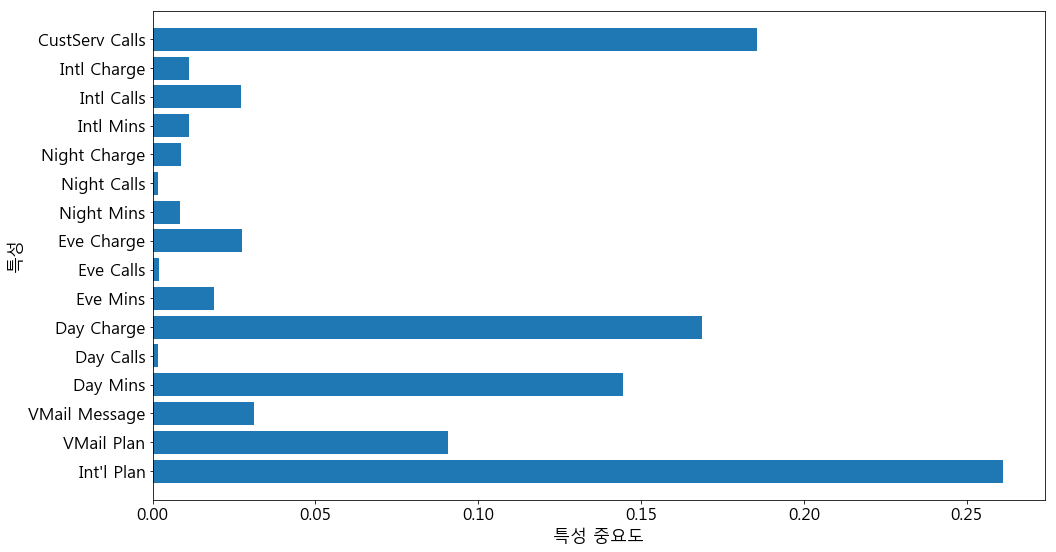

In [15]:
plot_tree(forest) #트리보다 좀더 다양한 시각으로 데이터를 분석
#언더샘플링
#Int'l Plan > CustServ Calls > Day Charge